## Importing libraries required for data preprocessing and EDA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("car_details.csv") #Reading the dataset

## Looking over the dataset 

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
df.info() #Gives information like count and datatypes of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
name             4340 non-null object
year             4340 non-null int64
selling_price    4340 non-null int64
km_driven        4340 non-null int64
fuel             4340 non-null object
seller_type      4340 non-null object
transmission     4340 non-null object
owner            4340 non-null object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.isnull().sum() #Checking for nullvalues

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
df.describe() #Gives count,mean,min,max,etc... for columns 

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
print("Owners:",df['owner'].unique())
print("Seller_type:",df['seller_type'].unique())   #Printing the unique values of owner,seller,fuel types
print("Fuels:",df['fuel'].unique())                         

Owners: ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
Seller_type: ['Individual' 'Dealer' 'Trustmark Dealer']
Fuels: ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


## visualization 

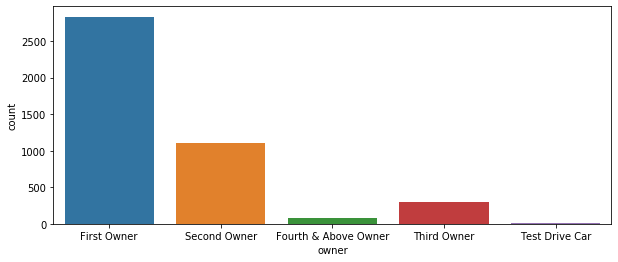

In [8]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['owner'])

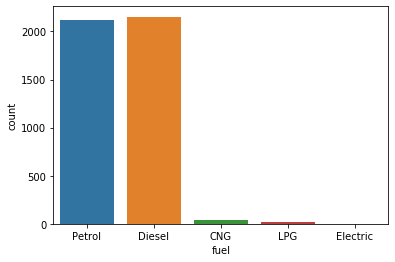

In [9]:
sns.countplot(x=df['fuel'])

In [10]:
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [11]:
def column(years):
    col=[]
    for year in years:
        col.append(2021-year)   #Creating a column years old to store the cars age
        
    return col

df["years_old"]=column(df["year"])

In [12]:
df.drop(['year'],axis=1,inplace=True)

In [13]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,years_old
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,14
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,14
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,9
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,4
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,7


In [14]:
df.drop(["name"],axis=1,inplace=True)

In [15]:
df=pd.get_dummies(df,drop_first=True)

In [16]:
df

,selling_price,km_driven,years_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,7,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,7,1,0,0,0,1,0,1,0,1,0,0
4336,409999,80000,7,1,0,0,0,1,0,1,0,1,0,0
4337,110000,83000,12,0,0,0,1,1,0,1,0,1,0,0
4338,865000,90000,5,1,0,0,0,1,0,1,0,0,0,0


## Scatterplots

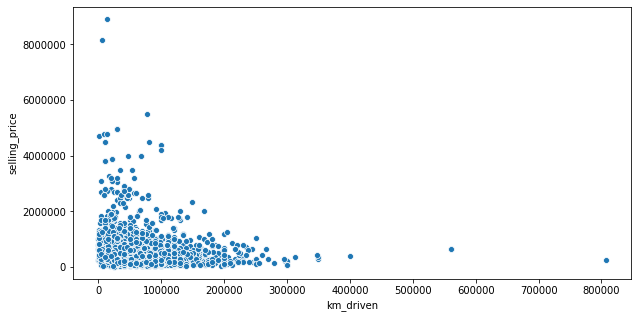

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["km_driven"],y=df["selling_price"])

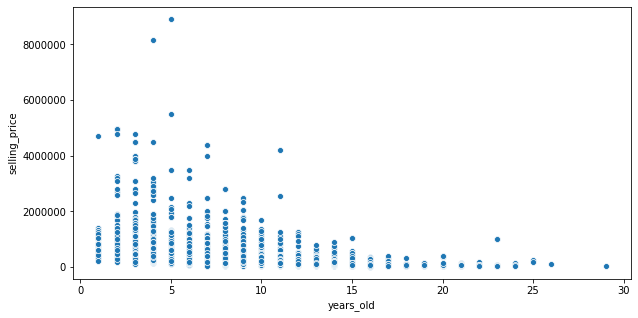

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["years_old"],y=df["selling_price"])

In [19]:
df.corr()

,selling_price,km_driven,years_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
years_old,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


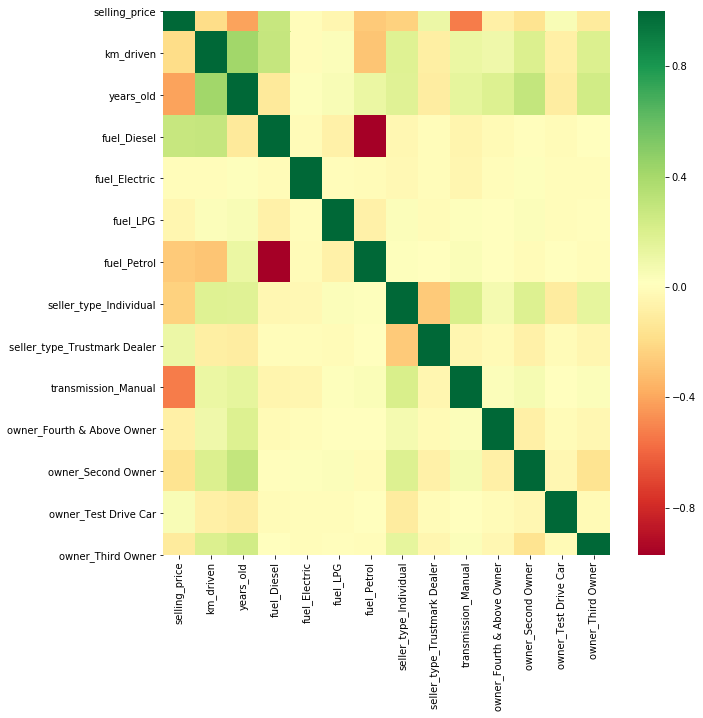

In [20]:
c=df.corr()
c_features=c.index
plt.figure(figsize=(10,10))
#Plot the heatmap
h=sns.heatmap(df[c_features].corr(),cmap="RdYlGn")

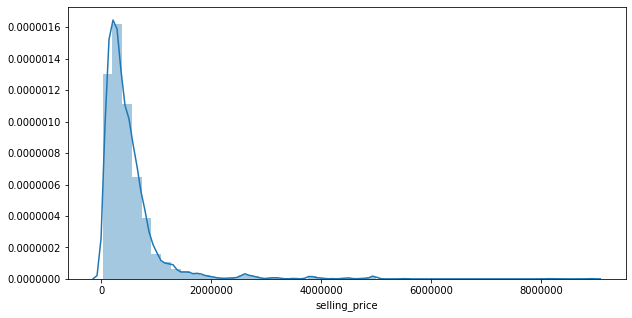

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(df['selling_price'])

## Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [94]:
from sklearn.preprocessing import StandardScaler
mod=StandardScaler()
df_scaled=mod.fit_transform(df)

In [97]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()

,selling_price,km_driven,years_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-0.767746,0.081139,1.445074,-0.992196,-0.015181,-0.072992,1.021899,0.581253,-0.155139,0.339276,-0.137908,-0.584800,-0.062709,-0.274449
1,-0.638096,-0.347689,1.445074,-0.992196,-0.015181,-0.072992,1.021899,0.581253,-0.155139,0.339276,-0.137908,-0.584800,-0.062709,-0.274449
2,0.165731,0.724381,0.258795,1.007865,-0.015181,-0.072992,-0.978571,0.581253,-0.155139,0.339276,-0.137908,-0.584800,-0.062709,-0.274449
3,-0.439300,-0.433455,-0.927485,-0.992196,-0.015181,-0.072992,1.021899,0.581253,-0.155139,0.339276,-0.137908,-0.584800,-0.062709,-0.274449
4,-0.093568,1.603479,-0.215717,1.007865,-0.015181,-0.072992,-0.978571,0.581253,-0.155139,0.339276,-0.137908,1.709986,-0.062709,-0.274449


In [98]:
y=df_scaled['selling_price']

In [99]:
X=df_scaled.iloc[:,1:]
X

,km_driven,years_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.081139,1.445074,-0.992196,-0.015181,-0.072992,1.021899,0.581253,-0.155139,0.339276,-0.137908,-0.584800,-0.062709,-0.274449
1,-0.347689,1.445074,-0.992196,-0.015181,-0.072992,1.021899,0.581253,-0.155139,0.339276,-0.137908,-0.584800,-0.062709,-0.274449
2,0.724381,0.258795,1.007865,-0.015181,-0.072992,-0.978571,0.581253,-0.155139,0.339276,-0.137908,-0.584800,-0.062709,-0.274449
3,-0.433455,-0.927485,-0.992196,-0.015181,-0.072992,1.021899,0.581253,-0.155139,0.339276,-0.137908,-0.584800,-0.062709,-0.274449
4,1.603479,-0.215717,1.007865,-0.015181,-0.072992,-0.978571,0.581253,-0.155139,0.339276,-0.137908,1.709986,-0.062709,-0.274449
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,0.295553,-0.215717,1.007865,-0.015181,-0.072992,-0.978571,0.581253,-0.155139,0.339276,-0.137908,1.709986,-0.062709,-0.274449
4336,0.295553,-0.215717,1.007865,-0.015181,-0.072992,-0.978571,0.581253,-0.155139,0.339276,-0.137908,1.709986,-0.062709,-0.274449
4337,0.359877,0.970563,-0.992196,-0.015181,-0.072992,1.021899,0.581253,-0.155139,0.339276,-0.137908,1.709986,-0.062709,-0.274449
4338,0.509967,-0.690229,1.007865,-0.015181,-0.072992,-0.978571,0.581253,-0.155139,0.339276,-0.137908,-0.584800,-0.062709,-0.274449


In [100]:
model=RandomForestRegressor()

In [101]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [103]:
n_estimators=[int(x) for x in np.linspace(100,1500,num=15)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,50,num=10)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [104]:
parameters={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split': min_samples_split,'min_samples_leaf':min_samples_leaf}
parameters

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300,
  1400,
  1500],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [105]:
rcv_model=RandomizedSearchCV(estimator=model,param_distributions=parameters,n_iter=10,cv=5, random_state=42,verbose=2,n_jobs=1,scoring='neg_mean_squared_error')

In [106]:
rcv_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   1.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   1.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   1.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   1.6s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   1.7s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=45 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=45, total=   0.8s
[CV] n_estimators=600, min_sampl

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=45, total=   1.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=45 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=45, total=   1.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=45 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=45, total=   1.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=45 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=45, total=   1.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=45 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=45, total=   1.8s
[CV] n_estimators=200, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [107]:
rcv_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 45}

In [108]:
rcv_model.best_score_

-0.38516402261404054

In [109]:
y_pred=rcv_model.predict(x_test)

In [110]:
y_pred_train=rcv_model.predict(X_train)

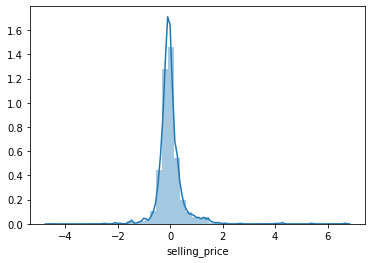

In [111]:
sns.distplot(y_test-y_pred)

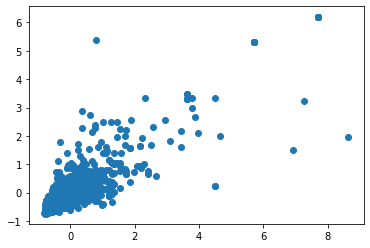

In [112]:
plt.scatter(y_test,y_pred)

In [113]:
from sklearn import metrics

In [114]:

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2938743184413196
MSE: 0.29121524770531393
RMSE: 0.5396436302832768


In [117]:
z=[[0.081139,1.445074,-0.992196,-0.015181,-0.072992,1.021899,0.581253,-0.155139,0.339276,-0.137908,-0.584800,-0.062709,-0.274449]]

In [118]:
rcv_model.predict(z)

array([-0.70821774])

In [123]:
(60000-504127.3117511521)/578548.7361388853

-0.7676575610814848

## Linear Regression

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
model=LinearRegression()

In [128]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
y_pred1=model.predict(x_test)
y_pred1

array([ 1.5923205 ,  1.62718254, -0.54309361, ..., -0.75908546,
       -0.4722555 , -0.20822259])

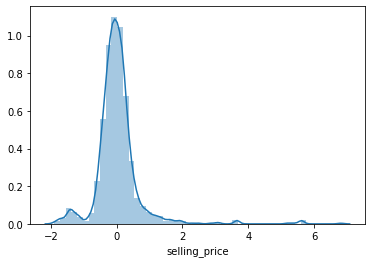

In [133]:
sns.distplot(y_test-y_pred1)

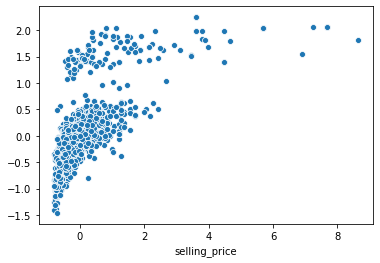

In [135]:
sns.scatterplot(y_test,y_pred1)

In [134]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 0.397606190510533
MSE: 0.5250031718780347
RMSE: 0.724571026109956


In [136]:
model.predict(z)

array([-0.78775409])

In [137]:
(60000-504127.3117511521)/578548.7361388853

-0.7676575610814848